In [ ]:
from google.colab import drive 
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import 
from tensorflow.keras.optimizers import 
from tensorflow.keras.losses import 
from tensorflow.keras.layers import 
from tensorflow.keras.models import 
from tensorflow.keras.callbacks import 
from tensorflow.keras.preprocessing.image import 
from tensorflow.keras.utils import 
from sklearn.metrics import 
from collections import Counter
import cv2
import numpy as np
import pandas as pd
import seaborn as sn
from keras import preprocessing
from tqdm import tqdm
from io import BytesIO
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from imageio import imread
from skimage.transform import resize
from sklearn.utils import compute_class_weight
from sklearn.model_selection import *
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings('ignore')
print("All modules have been imported")

All modules have been imported


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.


In [ ]:
images=[]
labels=[]
feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
def _parse_function(example, feature_dictionary=feature_dictionary):
    parsed_example = tf.io.parse_example(example, feature_dictionary)
    return parsed_example

def read_data(filename):
    full_dataset = tf.data.TFRecordDataset(filename,num_parallel_reads=tf.data.experimental.AUTOTUNE)
    full_dataset = full_dataset.cache()
    print("Size of Training Dataset: ", len(list(full_dataset)))
    
    feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }   

    full_dataset = full_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    print(full_dataset)
    for image_features in full_dataset:
        image = image_features['image'].numpy()
        image = tf.io.decode_raw(image_features['image'], tf.uint8)
        image = tf.reshape(image, [299, 299])        
        image=image.numpy()
        image=cv2.resize(image,(100,100))
        image=cv2.merge([image,image,image])
        image
        images.append(image)
        labels.append(image_features['label_normal'].numpy())

In [ ]:
filenames=['/content/drive/MyDrive/DDSM dataset/training10_0/training10_0.tfrecords',
          '/content/drive/MyDrive/DDSM dataset/training10_1/training10_1.tfrecords',
          '/content/drive/MyDrive/DDSM dataset/training10_2/training10_2.tfrecords',
          '/content/drive/MyDrive/DDSM dataset/training10_3/training10_3.tfrecords',
          '/content/drive/MyDrive/DDSM dataset/training10_4/training10_4.tfrecords'
          ]

for file in filenames:
    read_data(file)
    
print(len(images))
print(len(labels))

Size of Training Dataset:  11177
<ParallelMapDataset shapes: {image: (), label: (), label_normal: ()}, types: {image: tf.string, label: tf.int64, label_normal: tf.int64}>
Size of Training Dataset:  11177
<ParallelMapDataset shapes: {image: (), label: (), label_normal: ()}, types: {image: tf.string, label: tf.int64, label_normal: tf.int64}>
Size of Training Dataset:  11177
<ParallelMapDataset shapes: {image: (), label: (), label_normal: ()}, types: {image: tf.string, label: tf.int64, label_normal: tf.int64}>
Size of Training Dataset:  11177
<ParallelMapDataset shapes: {image: (), label: (), label_normal: ()}, types: {image: tf.string, label: tf.int64, label_normal: tf.int64}>
Size of Training Dataset:  11177
<ParallelMapDataset shapes: {image: (), label: (), label_normal: ()}, types: {image: tf.string, label: tf.int64, label_normal: tf.int64}>
55885
55885


In [ ]:
X=np.array(images)
y=np.array(labels)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10,shuffle=True,stratify=y)

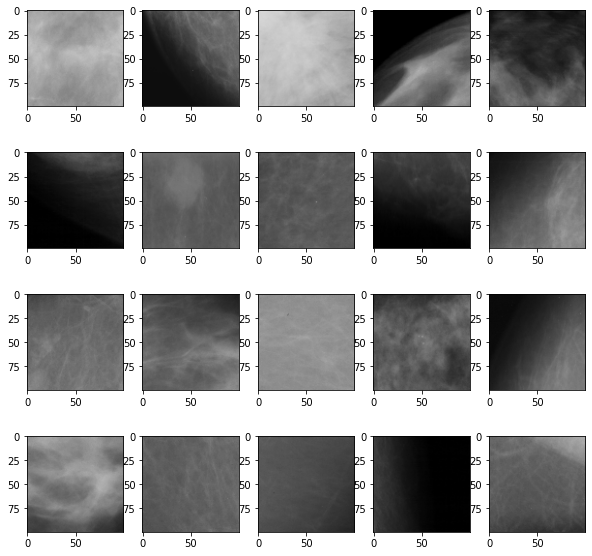

In [ ]:
fig=plt.figure(figsize=(10,10))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    img = np.random.randint(10)
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i])
plt.show()


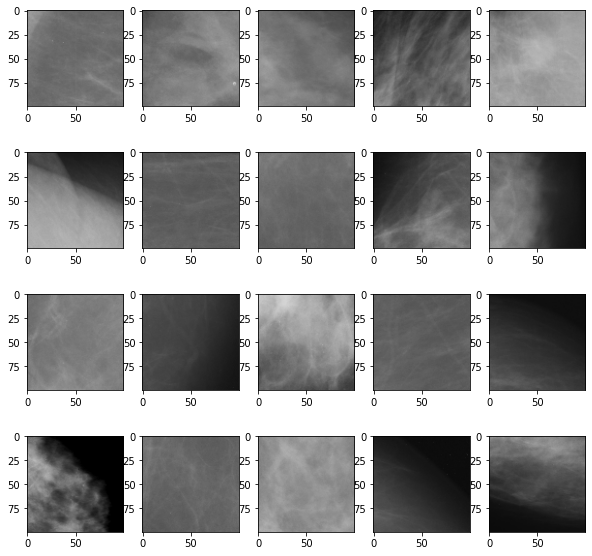

In [ ]:
fig=plt.figure(figsize=(10,10))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    img = np.random.randint(1)
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_t[i])
plt.show()


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics

print(x_train[0].shape)

(100, 100, 3)


In [ ]:
from tensorflow.keras.applications import InceptionV3*

base_model = InceptionV3(input_shape=(100,100,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(16,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(8,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(4,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
#for layer in base_model.layers:
#layer_trainable = False

base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_564 (Conv2D)             (None, 49, 49, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_586 (BatchN (None, 49, 49, 32)   96          conv2d_564[0][0]                 
__________________________________________________________________________________________________
activation_564 (Activation)     (None, 49, 49, 32)   0           batch_normalization_586[0][0]    
_______________________________________________________________________________________

In [ ]:
#c1= tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
c2=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=2,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy','AUC'])
history = model.fit(x_train, y_train,validation_split=0.2,epochs=36, batch_size=128,callbacks=[c2])

Epoch 1/36
280/280 [==============================] - 63s 195ms/step - loss: 0.2201 - accuracy: 0.9166 - auc: 0.9145 - val_loss: 0.1984 - val_accuracy: 0.9197 - val_auc: 0.9609
Epoch 2/36
280/280 [==============================] - 51s 184ms/step - loss: 0.1763 - accuracy: 0.9337 - auc: 0.9486 - val_loss: 0.1833 - val_accuracy: 0.9228 - val_auc: 0.9678
Epoch 3/36
280/280 [==============================] - 52s 185ms/step - loss: 0.1619 - accuracy: 0.9383 - auc: 0.9574 - val_loss: 0.2385 - val_accuracy: 0.9151 - val_auc: 0.8968
Epoch 4/36
280/280 [==============================] - 52s 186ms/step - loss: 0.1378 - accuracy: 0.9496 - auc: 0.9692 - val_loss: 0.1622 - val_accuracy: 0.9278 - val_auc: 0.9762
Epoch 5/36
280/280 [==============================] - 52s 187ms/step - loss: 0.1321 - accuracy: 0.9508 - auc: 0.9720 - val_loss: 0.1226 - val_accuracy: 0.9502 - val_auc: 0.9786
Epoch 6/36
280/280 [==============================] - 54s 195ms/step - loss: 0.1157 - accuracy: 0.9577 - auc: 0.977

In [ ]:
acc_rfc = accuracy_score(y_test, y_pred)
acc_rfc

0.9573230741701709

In [ ]:
y_pred=model.predict_classes(x_test)

target=["0","1"]
from sklearn import metrics
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),5))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred, average='weighted'),5))
print('Recall:', np.round(metrics.recall_score(y_test,y_pred, average='weighted'),5))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred, average='weighted'),5))
print('ROC AUC Score:', np.round(metrics.roc_auc_score(y_test, y_pred,multi_class='ovo', average='weighted'),5))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred),5))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred,target_names=target))

Accuracy: 0.95732
Precision: 0.95666
Recall: 0.95732
F1 Score: 0.95693
ROC AUC Score: 0.89705
Cohen Kappa Score: 0.80847
		Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      9719
           1       0.85      0.82      0.83      1458

    accuracy                           0.96     11177
   macro avg       0.91      0.90      0.90     11177
weighted avg       0.96      0.96      0.96     11177



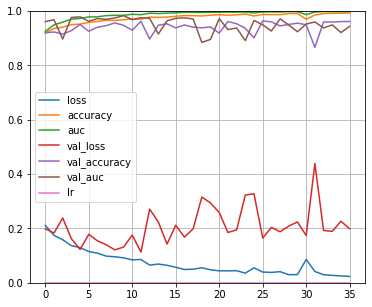

In [ ]:
pd.DataFrame(history.history).plot(figsize=(6, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

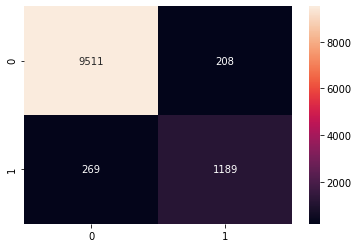

In [ ]:
cm = confusion_matrix(y_test, y_pred)u
cm
sns.heatmap(cm,annot=True,fmt='d')
